# Preparing exporting QMOF data

In [2]:
from mpcontribs.client import Client
import os
from pymatgen.io.ase import AseAtomsAdaptor
from ase.geometry.dimensionality import analyze_dimensionality
from ase.io import write

os.environ['MPCONTRIBS_API_KEY']='BEuiG4rxRKQR4M4q4S3tyHW7Y516a6Iz'
os.environ['SSL_CERT_FILE']='/Users/minhyukkang/opt/anaconda3/envs/TKenv/lib/python3.9/site-packages/certifi/cacert.pem'
client=Client(project='qmof')

# Downloading Files as .cif

In [ ]:
query_PBE = {'project':'qmof','formula__contains':'Cu', '_fields':['id','formula','data.EgPBE.value'], '_limit':500}
#subsitituting 'Cu' with another metal to get MOFs containing other metals
#modifying '_limit' to adjust the number of data MAX = 500
contribs_PBE = client.contributions.get_entries(**query_PBE).result()

contribs_PBE = contribs_PBE['data'].copy()

struct_ids = []
for contrib in contribs_PBE:
    c = client.get_contribution(contrib['id'])
    struct_ids.append(c["structures"][0]['id'])

#print(struct_ids)

ase_structs = []
for struct_id in struct_ids:
    s = client.get_structure(struct_id)
    s_ase = AseAtomsAdaptor.get_atoms(s)
    ase_structs.append(s_ase)

os.chdir('/Users/minhyukkang/Metal Structures')

for struct in ase_structs:
        write('geometry_{formula}.cif'.format(formula=struct.symbols), struct, wrap=True)

os.chdir('..')

# Calculating RDF and Find the minimum distance (Data Processing)

In [5]:
#Creating PBE data named as 'data_PBE' using pandas dataframe
import pandas as pd

query_PBE = {'project':'qmof', 'formula_contains' : 'Cu', '_fields':['id','formula','data.EgPBE.value'], '_limit':500}
contribs_PBE = client.contributions.get_entries(**query_PBE).result()

contribs_PBE = contribs_PBE['data'].copy()

struct_ids = []
for contrib in contribs_PBE:
        c = client.get_contribution(contrib['id'])
        struct_ids.append(c["structures"][0]['id'])

#print(struct_ids)

ase_structs = []
for struct_id in struct_ids:
    s = client.get_structure(struct_id)
    s_ase = AseAtomsAdaptor.get_atoms(s)
    ase_structs.append(s_ase)

#print(ase_structs)

data_PBE = pd.DataFrame(data=contribs_PBE)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(data_PBE)

['6196c6e7a6be6ad338993951', '6196c6e8a6be6ad338993958', '6196c6e9f8a517a48b6c3511', '6196c6eaa6be6ad33899397f', '6196c6eaa6be6ad33899398e', '6196c6eba6be6ad33899399f', '6196c6eca6be6ad3389939b9', '6196c6eda6be6ad3389939c6', '6196c6eea6be6ad3389939d9', '6196c6efa6be6ad3389939f3', '6196c6efa6be6ad3389939fa', '6196c6efa6be6ad338993a00', '6196c6f0f8a517a48b6c3570', '6196c6f1f8a517a48b6c357a', '6196c6f1f8a517a48b6c357f', '6196c6f1a6be6ad338993a1e', '6196c6f2a6be6ad338993a2b', '6196c6f3a6be6ad338993a42', '6196c6f4f8a517a48b6c35a7', '6196c6f7f8a517a48b6c35ca', '6196c6f7f8a517a48b6c35cf', '6196c6f7a6be6ad338993aa6', '6196c6f8f8a517a48b6c35de', '6196c6faa6be6ad338993ae1', '6196c6fda6be6ad338993b23', '6196c6fea6be6ad338993b31', '6196c6fff8a517a48b6c3642', '6196c6ffa6be6ad338993b3f', '6196c6ffa6be6ad338993b4e', '6196c700f8a517a48b6c365b', '6196c701a6be6ad338993b6d', '6196c704f8a517a48b6c3688', '6196c704a6be6ad338993ba7', '6196c704a6be6ad338993bb4', '6196c705f8a517a48b6c36a1', '6196c705f8a517a48b

In [9]:
#creating a list of metallic elements by sorting with electronegativity

from mendeleev import element
import mendeleev.fetch as m
ens = m.fetch_electronegativities()
mt = []
N = 1
for i in ens['Pauling']:
    if i < 2.5: mt.append(element(N).symbol)
    N = N + 1
non_mt = ['H','B','Si','P', 'Ge', 'As', 'Sb', 'Te', 'Po', 'At']
for j in non_mt:
    mt.remove(j)
print(mt)

['Li', 'Be', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Gd', 'Dy', 'Ho', 'Er', 'Tm', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']


                   Formula_Li  Radius       PBE
0             Li6H24C18N26O12    5.17  2.759250
1                Li4H52C68N16    5.47  2.271360
2                 Li2H22C26N8    6.09  2.093030
3                Li4H40C44N16    5.57  1.953170
4                 Li4H12C24O8    2.73  2.491980
5            Li2P4H34C10N2O16    4.43  5.917020
6              Li4H54C30S2N18    2.55  3.286010
7                 Li2H46C36N6    2.47  2.890510
8                Li4H28C28O16    3.41  3.185990
9                Li4H6C16N2O8    2.73  1.742710
10           Li4H16C20S4N4O12    4.37  3.932930
11             Li8H36C28N4O32    4.39  3.136280
12               Li2H8C14O6F6    3.09  3.754970
13          Li4H48C48S4N12O16    4.01  1.592650
14         Li4P2H48C44S4O18F6    4.35  2.966320
15            Li4H32C32N12O12    4.05  2.424380
16              Li4H16C4N20O6    2.65  3.712770
17                Li4H72C60N4    4.95  3.014360
18            Li4H44C32S4N8O8    2.73  3.176560
19             Li2H10C14N4O14    3.01  2

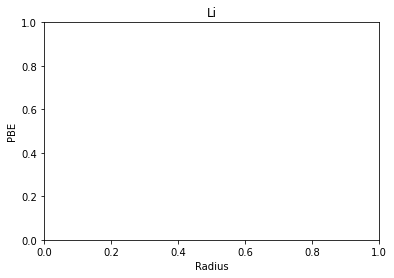

[]
           Formula_Be  Radius      PBE
0      K8Be4H24C32O36    3.87  3.27206
1  Be2Cd2H40C44S4N8O8    5.89  2.55945


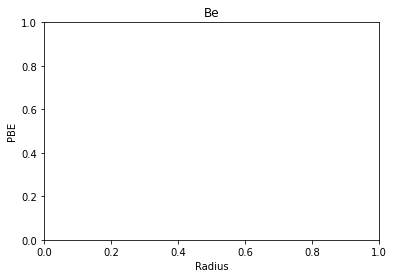

[]


KeyboardInterrupt: 

In [15]:
# RDF of a Crystal Structure

import numpy as np
from vasppy.rdf import RadialDistributionFunction
from pymatgen.core import Structure
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

r_zero=[] #for some molecules that has zero distance between metals after supercell
more_than_two_metals = []
excpt = []

#when using structures from .cif file
#for struct in ase_structs:
#    structure = Structure.from_file('/Users/minhyukkang/Metal_Structures/geometry_{formula}.cif'.format(formula=struct.symbols))


for i in mt:
    query_PBE = {'project':'qmof','formula__contains':i, '_fields':['id','formula','data.EgPBE.value'], '_limit':500}
    contribs_PBE = client.contributions.get_entries(**query_PBE).result()

    contribs_PBE = contribs_PBE['data'].copy()

    struct_ids = []
    r=[]
    n = 0

    for contrib in contribs_PBE:
            c = client.get_contribution(contrib['id'])
            struct_ids.append(c["structures"][0]['id'])

    for struct_id in struct_ids:
        structure = client.get_structure(struct_id)
        s_ase = AseAtomsAdaptor.get_atoms(structure)
        structure.make_supercell(2) #supercell by factor of 2 in all directions -- x,y,z
        #print(indices_cu)
        mt_for=[]
        PBE_value = float(str(pd.DataFrame(contribs_PBE)['data'][n]).replace('{\'EgPBE\': {\'value\': ','').replace('}}',''))
        n=n+1
        for x in mt:
            #getting indices of metal i and creating a list of metals in the specific formula -- mt_for
            if x in '{formula}'.format(formula=s_ase.symbols):
                exec(f'indices_{x} = [i for i, site in enumerate(structure) if site.species_string == x]')
                mt_for.append(x)
        try:
            if len(mt_for) == 1: #if there is only one metal -- metal itself
                y = mt_for[0]
                exec(f'rdf_{y}{y} = RadialDistributionFunction(structures=[structure],indices_i=indices_{y})')
                p = 0
                exec(f'if rdf_{y}{y}.r[rdf_{y}{y}.rdf.argmax()] > 0.1: p = find_peaks(rdf_{y}{y}.rdf)[0][0]')
                #finding the peak where rdf is the greatest
                if p==0: #molecules with errors
                    r_zero.append('{formula}'.format(formula=s_ase.symbols))
                    exec(f'min_r = rdf_{y}{y}.r[rdf_{y}{y}.rdf.argmax()]')
                else: #molecules without errors
                    exec(f'min_r = rdf_{y}{y}.r[p]')
                r.append(['{formula}'.format(formula=s_ase.symbols), min_r, PBE_value])
            elif len(mt_for) == 2: #for MOFs with two metals
                y0 = mt_for[0]
                y1 = mt_for[1]
                exec(f'rdf_{y0}{y1} = RadialDistributionFunction(structures=[structure],indices_i=indices_{y0},indices_j=indices_{y1})')
                exec(f'rdf_{y0}{y0} = RadialDistributionFunction(structures=[structure],indices_i=indices_{y0})')
                exec(f'rdf_{y1}{y1} = RadialDistributionFunction(structures=[structure],indices_i=indices_{y1})')
                exec(f'p_{y0}{y1}=0')
                exec(f'p_{y0}{y0}=0')     
                exec(f'p_{y1}{y1}=0')     
                exec(f'if rdf_{y0}{y1}.r[rdf_{y0}{y1}.rdf.argmax()] > 0.1: p_{y0}{y1} = find_peaks(rdf_{y0}{y1}.rdf)[0][0]')
                exec(f'if rdf_{y0}{y0}.r[rdf_{y0}{y0}.rdf.argmax()] > 0.1: p_{y0}{y0} = find_peaks(rdf_{y0}{y0}.rdf)[0][0]')
                exec(f'if rdf_{y1}{y1}.r[rdf_{y1}{y1}.rdf.argmax()] > 0.1: p_{y1}{y1} = find_peaks(rdf_{y1}{y1}.rdf)[0][0]')
                exec(f'min_r = min([rdf_{y0}{y1}.r[p_{y0}{y1}], rdf_{y0}{y0}.r[p_{y0}{y0}], rdf_{y1}{y1}.r[p_{y1}{y1}]])')
                r.append(['{formula}'.format(formula=s_ase.symbols), min_r, PBE_value])
            else:
                more_than_two_metals.append('{formula}'.format(formula=s_ase.symbols))

        except Exception:
            excpt.append('{formula}'.format(formula=s_ase.symbols))

    exec(f'data_combined_{i} = pd.DataFrame(data=r, columns = [\'Formula_{i}\', \'Radius\', \'PBE\'])')
    exec(f'print(data_combined_{i})')
    exec(f'plt.scatter(data_combined_{i}[\'Radius\'] , data_combined_{i}[\'PBE\'])')
    plt.xlabel('Radius')
    plt.ylabel('PBE')
    plt.title(i)
    plt.show()
    print(r_zero)
print(more_than_two_metals)

# Data Analysis

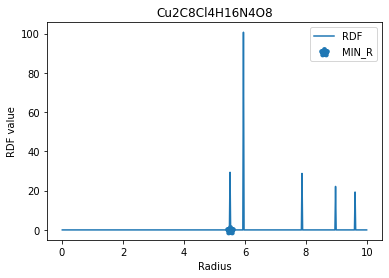

In [12]:
#Drawing the RDF graph for a specific molecule

from pymatgen.core.structure import Structure
import numpy as np
from vasppy.rdf import RadialDistributionFunction
from pymatgen.core import Structure
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

A = ['Cu2C8Cl4H16N4O8']
#for i in list_small_r_Ha:
for i in A: 
    exec(f'structure = Structure.from_file(\'/Users/minhyukkang/Metal Structures/Cu_Structures/geometry_{i}.cif\')')
    structure.make_supercell(2)
    #print(indices_cu)
    #rdf_cucu = RadialDistributionFunction(structures=[structure],indices_i=indices_cu)
    mt_for=[]
    indices_Cu = [i for i, site in enumerate(structure) if site.species_string == 'Cu']
    for x in mt:
        if x in i:
            exec(f'indices_{x} = [i for i, site in enumerate(structure) if site.species_string == x]')
            mt_for.append(x)
    if len(mt_for) == 1:
        rdf_CuCu = RadialDistributionFunction(structures=[structure],indices_i=indices_Cu)
        max_rdf_CuCu = max(rdf_CuCu.rdf)
        p=0
        if rdf_CuCu.r[rdf_CuCu.rdf.argmax()] > 0.1:p = find_peaks(rdf_CuCu.rdf)[0][0]
        plt.plot(rdf_CuCu.r, rdf_CuCu.rdf, label = 'RDF')
        if p==0:
            r_zero.append('{formula}'.format(formula=struct.symbols))
            min_r = rdf_CuCu.r[rdf_CuCu.rdf.argmax()]
        else:
            min_r = rdf_CuCu.r[p]
        plt.scatter(min_r, 0, marker = '*', linewidths = 5, label = 'MIN_R')
        plt.legend()
        plt.xlabel('Radius')
        plt.ylabel('RDF value')
        plt.title(i)
        plt.show()
    elif len(mt_for) == 2:
        for y in mt_for:
            rdf_CuCu = RadialDistributionFunction(structures=[structure],indices_i=indices_Cu)
            exec(f'rdf_Cu{y} = RadialDistributionFunction(structures=[structure],indices_i=indices_Cu,indices_j=indices_{y})')
            exec(f'rdf_{y}{y} = RadialDistributionFunction(structures=[structure],indices_i=indices_{y})')
            p_CuCu = 0
            if rdf_CuCu.r[rdf_CuCu.rdf.argmax()] > 0.1: p_CuCu = find_peaks(rdf_CuCu.rdf)[0][0]
            exec(f'p_Cu{y}=0')
            exec(f'p_{y}{y}=0')              
            exec(f'if rdf_Cu{y}.r[rdf_Cu{y}.rdf.argmax()] > 0.1: p_Cu{y} = find_peaks(rdf_Cu{y}.rdf)[0][0]')
            exec(f'if rdf_{y}{y}.r[rdf_{y}{y}.rdf.argmax()] > 0.1: p_{y}{y} = find_peaks(rdf_{y}{y}.rdf)[0][0]')
            exec(f'min_r = min([rdf_CuCu.r[p_CuCu], rdf_Cu{y}.r[p_Cu{y}], rdf_{y}{y}.r[p_{y}{y}]])')
            plt.plot(rdf_CuCu.r, rdf_CuCu.rdf, label = 'rdf_CuCu')
            exec(f'plt.plot(rdf_Cu{y}.r, rdf_Cu{y}.rdf, label = \'rdf_Cu{y}\')')
            exec(f'plt.plot(rdf_{y}{y}.r, rdf_{y}{y}.rdf, label = \'rdf_{y}{y}\')')
            plt.scatter(min_r, 0, marker = '*', linewidths = 5, label = 'MIN_R')
            plt.legend()
            plt.xlabel('Radius')
            plt.ylabel('RDF value')
            plt.title(i)
            plt.show()
    else:
        more_than_two_metals.append('{formula}'.format(formula=struct.symbols))

                   Formula_Co  Radius       PBE
136         Ba2Co2H26C16N2O20    3.87  1.058060
89              Ba2CoH14C6O16    3.59  0.777235
138         Cd2Co2H28C16N4O20    3.85  0.500521
84          Cd2Co2H28C44N8O18    3.59  0.944823
72        CdCo2H54C66N12Cl2O4    7.67  1.629690
278        Co10H48C40S4N12O44    2.99  0.160848
177        Co12H114C150N18O48    3.31  0.227876
157     Co12H136C176S12N16O48    3.51  0.292197
306        Co12H144C192N24O48    6.71  0.396624
93          Co12H148C164N8O66    3.25  0.297050
370        Co12H160C212N16O48    3.45  0.319232
81       Co12H168C200S12N8O80    3.57  0.449804
429           Co12H32C56N8O40    3.13  0.125815
163       Co12H48C72N30Cl6O24    2.95  0.132766
478             Co12H88C48O80    3.13  0.197634
321          Co12H96C168N8O60    3.21  0.261305
116     Co16H144C144S24N64O72    5.37  0.484860
491          Co16H80C96N64O32    3.71  0.783792
149          Co18H64C88N36O40    3.09  0.143498
447        Co20H104C128N16O80    3.09  0

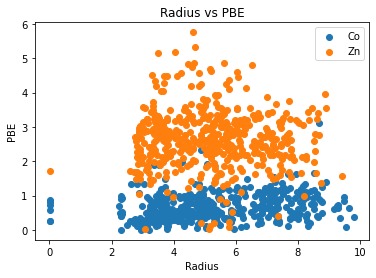

In [183]:
#Comparing MOFs with different metals

import matplotlib.pyplot as plt

plt.scatter(data_combined_Co['Radius'] , data_combined_Co['PBE'], label = 'Co')
plt.scatter(data_combined_Zn['Radius'] , data_combined_Zn['PBE'], label = 'Zn')
print(data_combined_Co.sort_values(by = 'Formula_Co'))
print(data_combined_Zn.sort_values(by = 'PBE'))
#plt.scatter(data_combined_r_list, data_combined_PBE_list)
#plt.yticks([0.6,0.8,1.0])
#plt.figure(figsize=(100, 100))
plt.legend()
plt.xlabel('Radius')
plt.ylabel('PBE')
plt.title('Radius vs PBE')
plt.show()

In [172]:
#Finding molecules that have the same formula

Co_Zn_cmmn = []
n = 0
for i in data_combined_Co['Formula_Co']:
    a = i.replace('Co' ,'')
    m = 0
    for j in data_combined_Zn['Formula_Zn']:
        if str.__contains__(j, a) == True: 
                Co_Zn_cmmn.append([n, i, j,data_combined_Co['Radius'][n], data_combined_Zn['Radius'][m],  data_combined_Co['PBE'][n], data_combined_Zn['PBE'][m]])
        m = m+1
    n = n+1
pd.DataFrame(Co_Zn_cmmn, columns = ['n','Formula_Co', 'Formula_Zn','Radius_Co','Radius_Zn', 'PBE_Co', 'PBE_Zn'])

,n,Formula_Co,Formula_Zn,Radius_Co,Radius_Zn,PBE_Co,PBE_Zn
0,17,Co2H8C8O12,Zn2H8C8O12,4.95,5.35,0.441096,3.68928
1,18,Co2H26C32Cl2O14,Zn2H26C32Cl2O14,3.63,3.69,0.456537,2.79157
2,21,Co2H44C64N8O14,Zn2H44C64N8O14,4.37,6.09,0.714899,2.62441
3,28,Co8H96C160N16O32,Zn8H96C160N16O32,7.11,7.21,0.683013,2.49787
4,39,Co2H40C44N4O16,Zn2H40C44N4O16,7.29,7.29,0.434536,2.65922
5,52,CoMo4H24C36N12O13,ZnMo4H24C36N12O13,3.65,3.67,0.639479,1.98852
6,53,CoH20C32Br4N8O8,ZnH20C32Br4N8O8,8.61,8.51,1.049870,2.58739
7,58,Co4H48C56N16O16,Zn4H48C56N16O16,6.03,6.47,1.250270,3.54427
8,58,Co4H48C56N16O16,Zn4H48C56N16O16,6.03,6.03,1.250270,3.55303
9,73,Co2H24C28N20,Zn2H24C28N20,7.23,7.41,1.541970,3.02548


In [14]:
cmmn = []
ni = 0
for i in data_combined_Co['Formula_Co']:
    a = i.replace('Co' ,'')
    nj = 0
    for j in data_combined_Ni['Formula_Ni']:
        if str.__contains__(j, a) == True:
            #print(i,j)
            nk = 0
            for k in data_combined_Zn['Formula_Zn']:
                if str.__contains__(k, a) == True:
                    cmmn.append([ni, i, j, k,  data_combined_Co['PBE'][ni], data_combined_Ni['PBE'][nj], data_combined_Zn['PBE'][nk]])
                    #nl = 0
                    #for l in data_combined_Zn['Formula_Zn']:
                    #    if str.__contains__(l, a) == True:
                    #        print(i,j,k,l)
                        #nl = nl+1
                nk = nk+1
        nj = nj+1
    ni = ni+1
pd_cmmn = pd.DataFrame(cmmn, columns = ['No.','Formula_Co', 'Formula_Ni','Formula_Zn' , 'PBE_Co', 'PBE_Ni', 'PBE_Zn'])
pd_cmmn

NameError: name 'data_combined_Co' is not defined

In [13]:
#graphing a PBE trend for molecules shared by two metals

for i in range(15):
    plt.plot([1,2,3], [pd_cmmn['PBE_Co'][i], pd_cmmn['PBE_Ni'][i], pd_cmmn['PBE_Zn'][i]], label = pd_cmmn['Formula_Co'][i].replace('Co', 'Mt'))
plt.xticks([1,2,3], ['Co', 'Ni', 'Zn'])
plt.ylabel('Bandgap (eV) PBE')
plt.legend(bbox_to_anchor = (1.1,1.05)) 
plt.show()

NameError: name 'pd_cmmn' is not defined

In [251]:
cmmn = []
ni = 0
for i in data_combined_Co['Formula_Co']:
    a = i.replace('Co' ,'')
    nj = 0
    for j in data_combined_Cu['Formula_Cu']:
        if str.__contains__(j, a) == True:
            #print(i,j)
            nk = 0
            for k in data_combined_Zn['Formula_Zn']:
                if str.__contains__(k, a) == True:
                    cmmn.append([i, j, k,data_combined_Co['PBE'][ni], data_combined_Cu['PBE'][nj], data_combined_Zn['PBE'][nk]])
                    #nl = 0
                    #for l in data_combined_Zn['Formula_Zn']:
                    #    if str.__contains__(l, a) == True:
                    #        print(i,j,k,l)
                        #nl = nl+1
                nk = nk+1
        nj = nj+1
    ni = ni+1
pd.DataFrame(cmmn, columns = ['Formula_Co', 'Formula_Cu','Formula_Zn', 'PBE_Co', 'PBE_Cu', 'PBE_Zn'])

,Formula_Co,Formula_Cu,Formula_Zn,PBE_Co,PBE_Cu,PBE_Zn
0,Co2H40C44N4O16,Cu2H40C44N4O16,Zn2H40C44N4O16,0.434536,0.520610,2.65922
1,Co2H24C28N20,Cu2H24C28N20,Zn2H24C28N20,1.541970,0.695230,3.02548
2,Co2H12C14N8,Cu2H12C14N8,Zn2H12C14N8,0.813423,0.387545,4.04432


In [212]:
cmmn = []
ni = 0
for i in data_combined_Ni['Formula_Ni']:
    a = i.replace('Ni' ,'')
    nj = 0
    for j in data_combined_Cu['Formula_Cu']:
        if str.__contains__(j, a) == True:
            #print(i,j)
            nk = 0
            for k in data_combined_Zn['Formula_Zn']:
                if str.__contains__(k, a) == True:
                    cmmn.append([i, j, k,data_combined_Ni['Radius'][ni], data_combined_Cu['Radius'][nj], data_combined_Zn['Radius'][nk],  data_combined_Ni['PBE'][ni], data_combined_Cu['PBE'][nj], data_combined_Zn['PBE'][nk]])
                    #nl = 0
                    #for l in data_combined_Zn['Formula_Zn']:
                    #    if str.__contains__(l, a) == True:
                    #        print(i,j,k,l)
                        #nl = nl+1
                nk = nk+1
        nj = nj+1
    ni = ni+1
pd.DataFrame(cmmn, columns = ['Formula_Ni', 'Formula_Cu','Formula_Zn' ,'Radius_Ni','Radius_Cu','Radius_Zn', 'PBE_Ni', 'PBE_Cu', 'PBE_Zn'])

,Formula_Ni,Formula_Cu,Formula_Zn,Radius_Ni,Radius_Cu,Radius_Zn,PBE_Ni,PBE_Cu,PBE_Zn
0,Ni2H12C12N4O12,Cu2H12C12N4O12,Zn2H12C12N4O12,5.99,6.05,4.47,1.20368,0.511703,2.32369


Text(0.5, 1.0, 'Box-and-Whisker PBE')

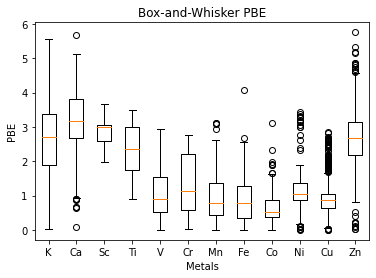

In [182]:
#Drawing a box-and-whisker plot of Bandgaps for MOFs containing specific molecules

fig, ax = plt.subplots()
P4Mt = ['K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn'] 
for i in P4Mt:
    exec(f'{i}_PBE = data_combined_{i}[\'PBE\']')
ax.boxplot([K_PBE,Ca_PBE,Sc_PBE,Ti_PBE,V_PBE,Cr_PBE,Mn_PBE,Fe_PBE,Co_PBE,Ni_PBE,Cu_PBE,Zn_PBE])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], P4Mt)
plt.xlabel('Metals')
plt.ylabel('Bandgap (eV) PBE')
plt.title('Box-and-Whisker PBE')

[]


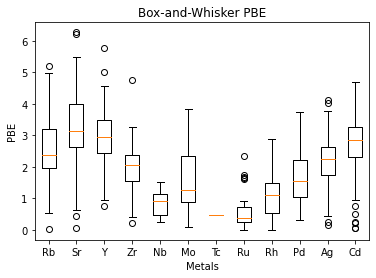

In [181]:
fig, ax = plt.subplots()
P5Mt = ['Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd'] 
P5Mt_list = []
for i in P5Mt:
    exec(f'{i}_PBE = data_combined_{i}[\'PBE\']')
ax.boxplot([Rb_PBE,Sr_PBE,Y_PBE,Zr_PBE,Nb_PBE,Mo_PBE,Tc_PBE,Ru_PBE,Rh_PBE,Pd_PBE,Ag_PBE,Cd_PBE])
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], P5Mt)
plt.xlabel('Metals')
plt.ylabel('Bandgap (eV) PBE')
plt.title('Box-and-Whisker PBE')
print(P5Mt_list)

In [17]:
#Creating PBE-only data
import pandas as pd
not_exist = []
cu = ['Cu']
for i in mt:
    query_PBE = {'project':'qmof','formula__contains':i, '_fields':['formula','data.EgPBE.value'], '_limit':500}
    contribs_PBE = client.contributions.get_entries(**query_PBE).result()

    contribs_PBE = contribs_PBE['data'].copy()
    pd_PBE = pd.DataFrame(contribs_PBE)
    PBE_list = []
    n = 0
    try:
        for j in pd_PBE['formula']:    
            PBE_list.append([j, float(str(pd_PBE['data'][n]).replace('{\'EgPBE\': {\'value\': ','').replace('}}',''))])
            n = n+1
    except:
        PBE_list.append([j, 0])
    exec(f'pd_PBE_{i} = pd.DataFrame(PBE_list, columns = [\'formula\', \'PBE\']).sort_values(by = \'PBE\')')
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)
    exec(f'print(pd_PBE_{i})')


                      formula       PBE
226          Li2PuC14H10N2O12  0.130269
227          Li2NpC14H10N2O12  0.193577
163      Li2Mn2C32Cl8H24N4O12  0.621213
85          Cu4Li4C12H16O20P4  0.699377
119              Li4C56H28O16  0.752039
171            Li6C44H34N2O18  0.761033
203         Li6Pu2C28H24N4O26  0.786872
118              Li4C56H36O20  1.074040
117              Li8C56H40O24  1.134880
120            Li4C56H32N4O24  1.152180
116              Li4C28H20O12  1.175950
157           Li4Mn4C24H16O32  1.180620
189           Li4C32Cl8H28O20  1.213770
242              Li8C32H56O40  1.280150
179            Li4C44H32N4O16  1.333650
188              Li4C12H12O12  1.450730
48        Li2Pd2C74Cl4H78N8P4  1.586010
128               Li2C38H34O6  1.587260
13          Li4C48H48N12O16S4  1.592650
115              Li4C64H28O24  1.731730
153            Li4C28H28N8O20  1.739580
220            Li4C8H20N16O20  1.740800
9                Li4C16H6N2O8  1.742710
230           Li4Mn2C32H24O20  1.829160


In [29]:
#Creating HSE-only data
for i in mt:
    query_HSE = {'project':'qmof','formula__contains':i, '_fields':['formula','data.EgHSE06.value'], '_limit':500}
    contribs_HSE = client.contributions.get_entries(**query_HSE).result()

    contribs_HSE = contribs_HSE['data'].copy()
    pd_HSE = pd.DataFrame(contribs_HSE)
    HSE_list = []
    n = 0
    try:
        for j in pd_HSE['formula']:    
            HSE_list.append([j, float(str(pd_HSE['data'][n]).replace('{\'EgHSE06\': {\'value\': ','').replace('}}',''))])
            n = n+1
    except:
        HSE_list.append([j, 0])
    exec(f'pd_HSE_{i} = pd.DataFrame(HSE_list, columns = [\'formula\', \'HSE\']).sort_values(by = \'HSE\')')
    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)
    exec(f'print(pd_HSE_{i})')

                      formula      HSE
171            Li6C44H34N2O18  1.25082
119              Li4C56H28O16  1.31924
118              Li4C56H36O20  1.72888
117              Li8C56H40O24  1.78673
116              Li4C28H20O12  1.88557
120            Li4C56H32N4O24  1.98038
189           Li4C32Cl8H28O20  2.16298
242              Li8C32H56O40  2.25387
188              Li4C12H12O12  2.39714
128               Li2C38H34O6  2.52542
153            Li4C28H28N8O20  2.59598
163      Li2Mn2C32Cl8H24N4O12  2.63097
226          Li2PuC14H10N2O12  2.74233
13          Li4C48H48N12O16S4  2.75484
220            Li4C8H20N16O20  2.79045
179            Li4C44H32N4O16  2.80618
115              Li4C64H28O24  2.93042
253             Li2C28H14N8O4  2.93114
217             Li2C6H24N6Se2  3.04653
3                Li4C44H40N16  3.05285
56          Li4Mo2C40H44N4O20  3.08432
9                Li4C16H6N2O8  3.10131
241              Li4C24H20O12  3.10734
200             Li2C38H48O2P2  3.15420
227          Li2NpC14H10N

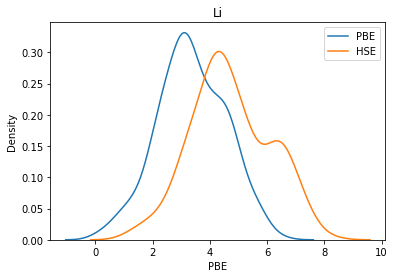

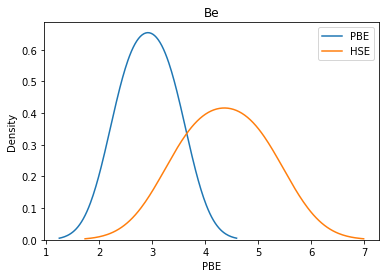

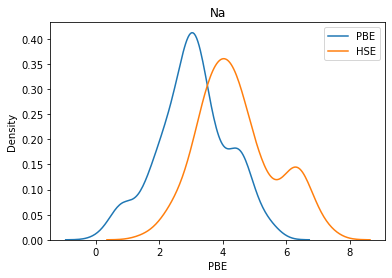

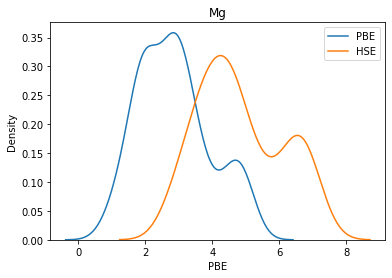

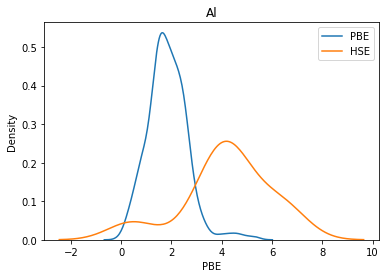

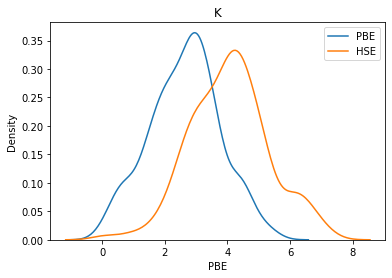

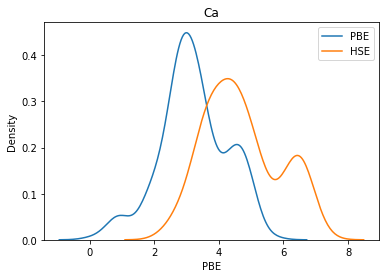

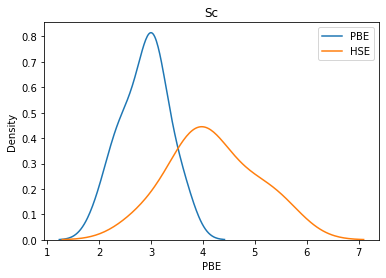

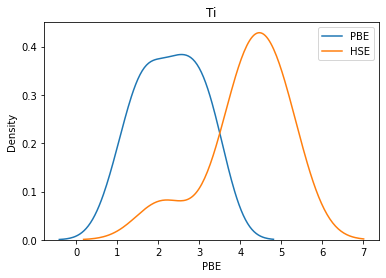

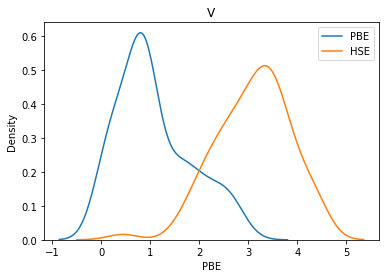

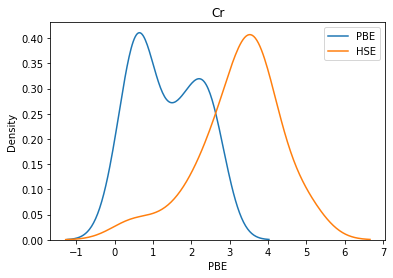

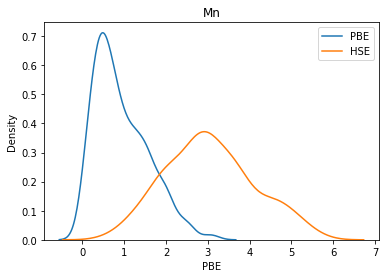

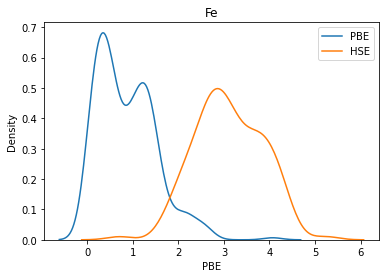

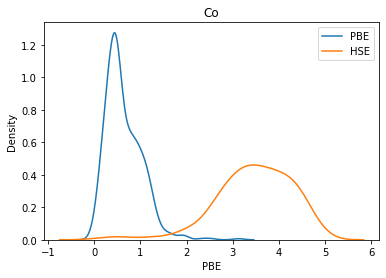

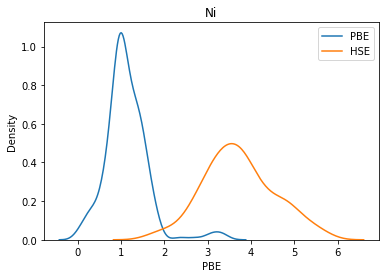

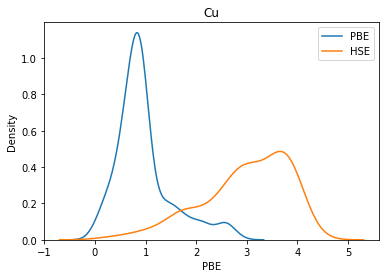

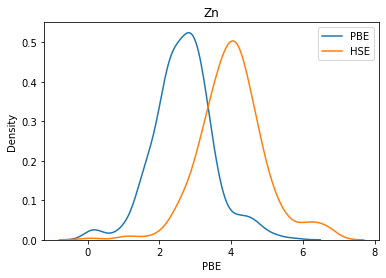

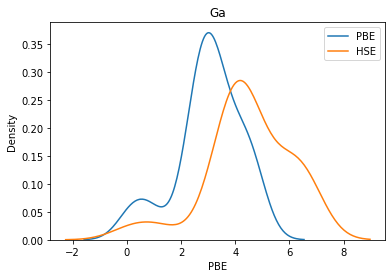

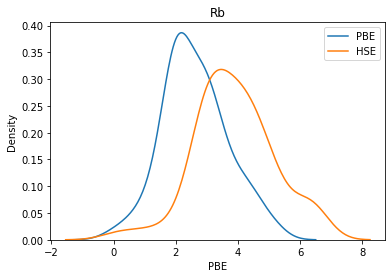

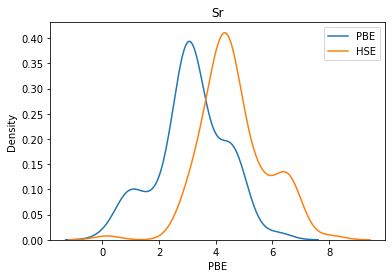

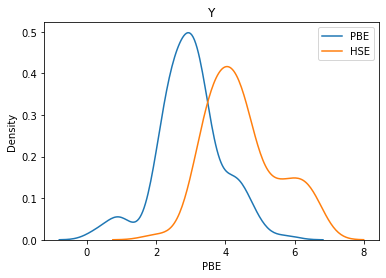

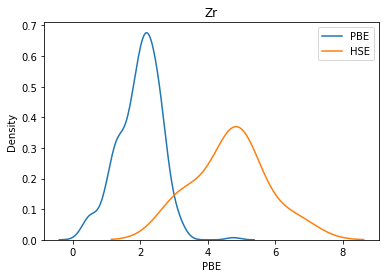

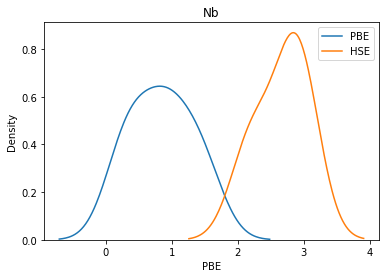

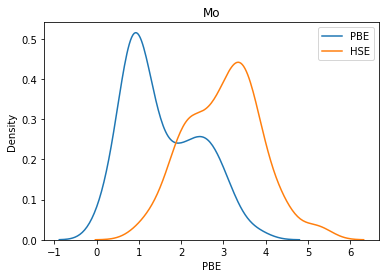

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


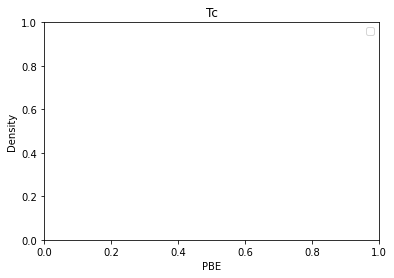

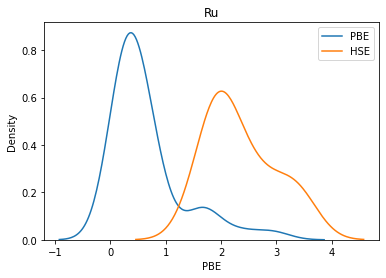

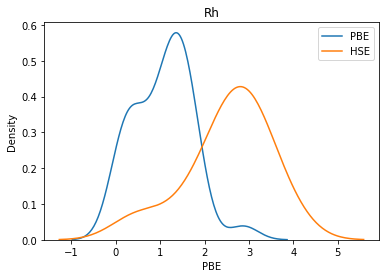

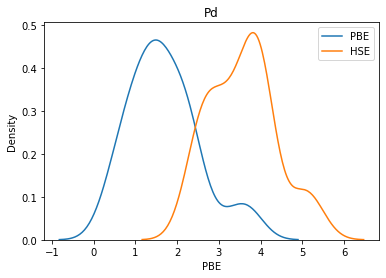

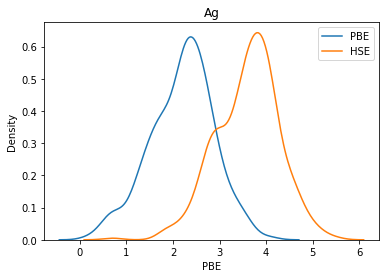

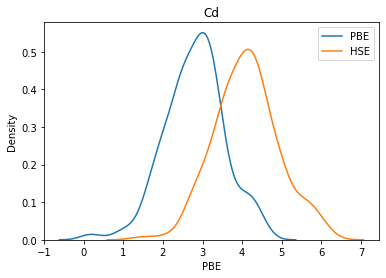

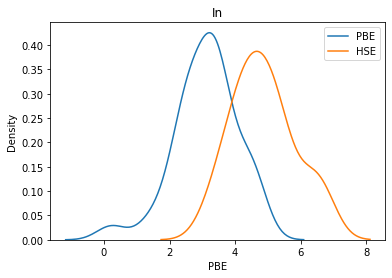

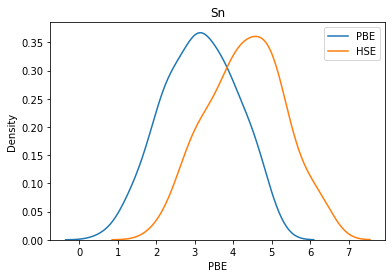

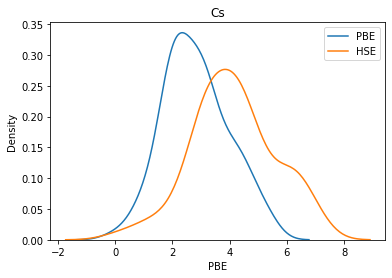

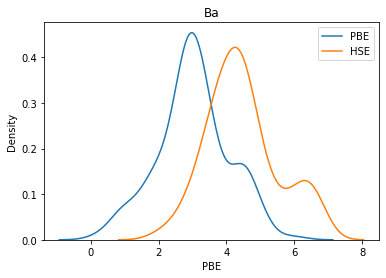

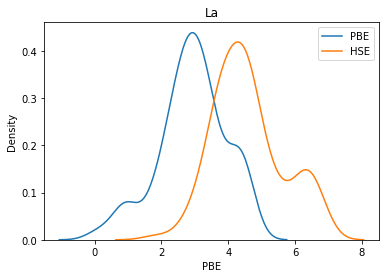

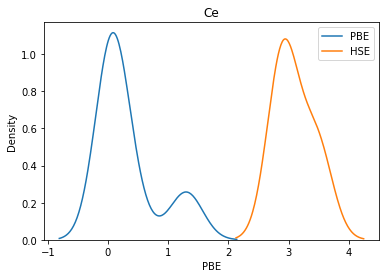

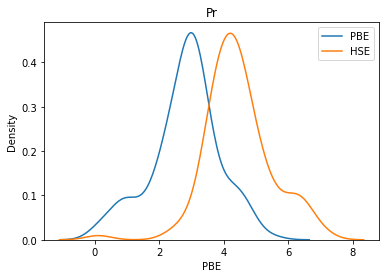

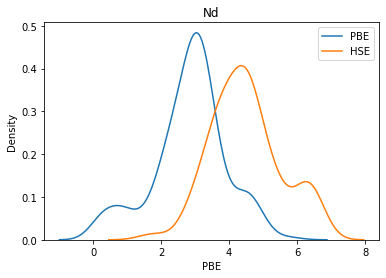

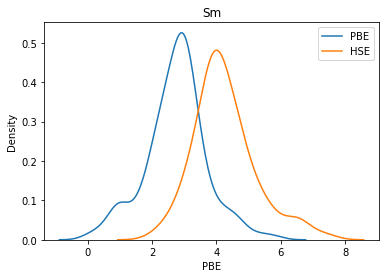

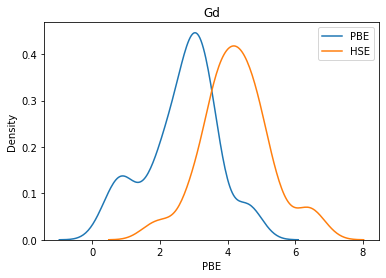

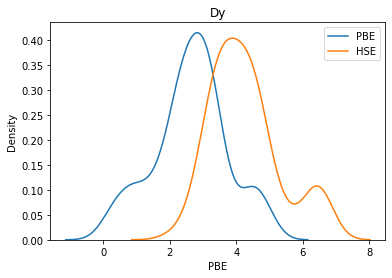

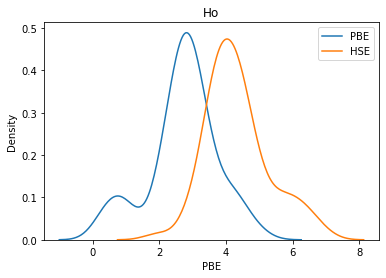

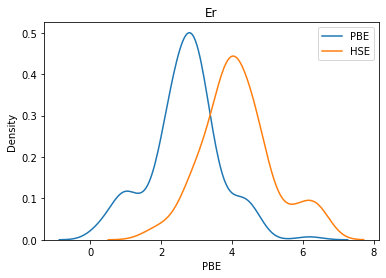

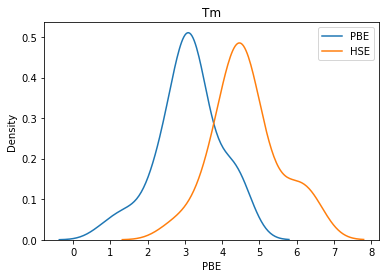

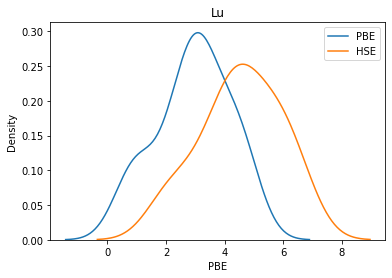

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


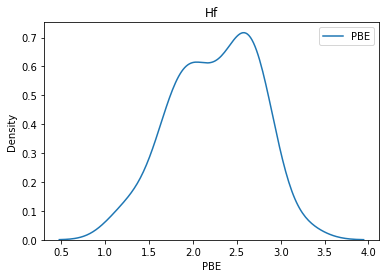

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


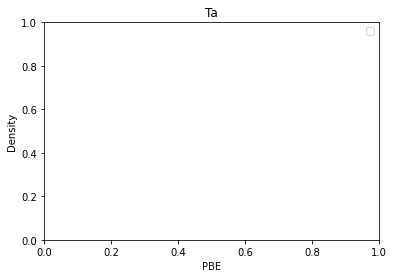

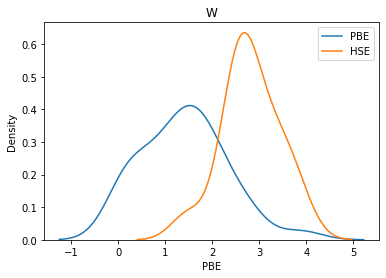

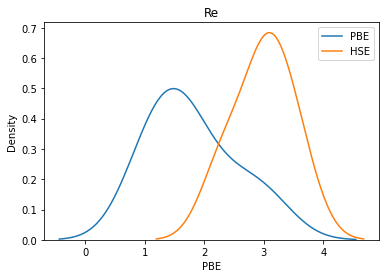

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


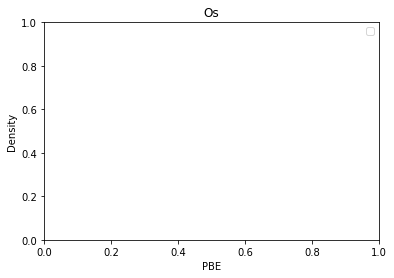

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


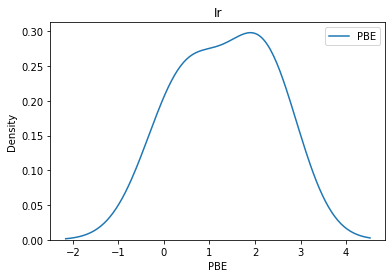

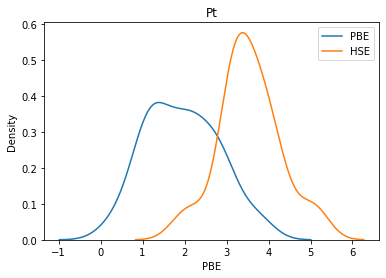

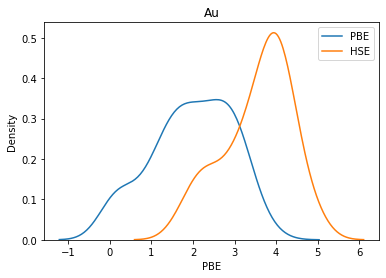

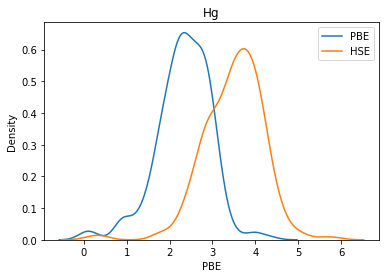

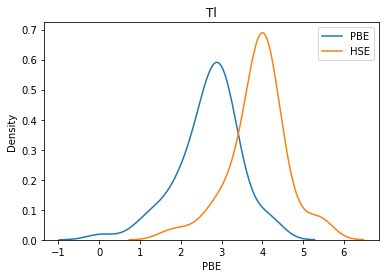

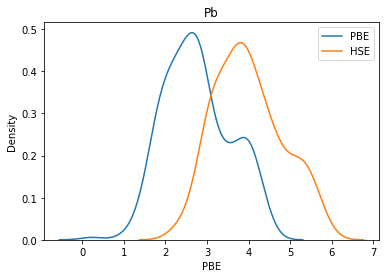

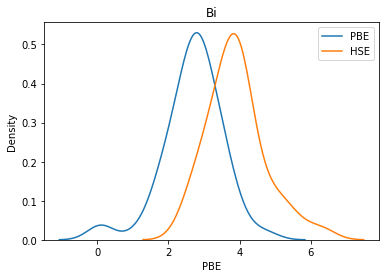

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


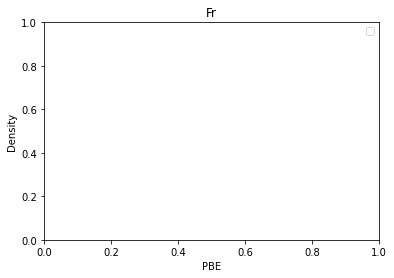

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


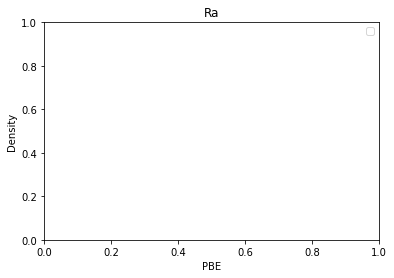

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


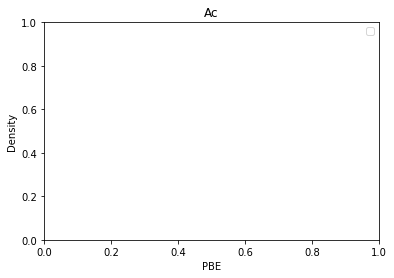

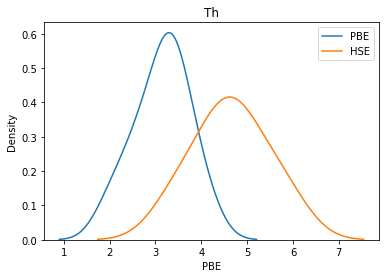

<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
<string>:1: builtins.UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


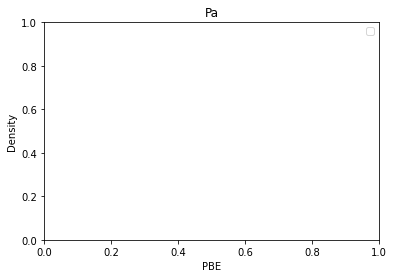

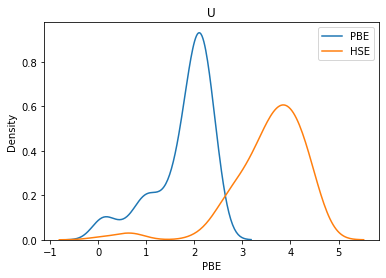

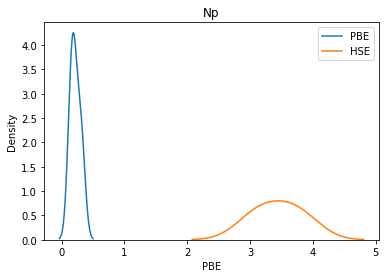

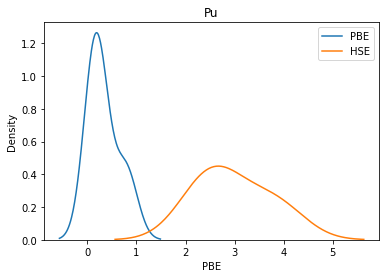

In [32]:
#Drawing density distribution graph for 

import seaborn as sns
import matplotlib.pyplot as plt

for i in mt:
    #exec(f'print(pd_PBE_{i})')
    #exec(f'print(pd_HSE_{i})')
    exec(f'sns.kdeplot(pd_PBE_{i}[\'PBE\'])')
    exec(f'sns.kdeplot(pd_HSE_{i}[\'HSE\'])')
    plt.legend(['PBE', 'HSE'])
    plt.title(i)
    plt.show()

Text(0, 0.5, 'HSE')

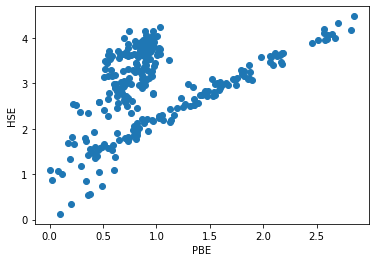

In [13]:
#Comparing Bandgap values using PBe and HSE

import matplotlib.pyplot as plt

plt.scatter(pd_PBE_Cu['PBE'], pd_PBE_Cu['HSE'])
plt.xlabel('PBE')
plt.ylabel('HSE')

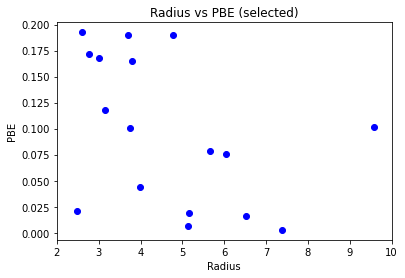

               formula  radius       PBE
1   Cu2H12C24S2N8Cl4O4    7.39  0.002652
10        Cu4H24C16O28    5.13  0.006576
3     Cu2H24C26S4N6O14    6.53  0.016252
15          CuH4C4N4O4    5.17  0.018703
13    Cu3H18C16Br4N2O4    2.49  0.020680
2     Cu2H20C20Br4N4O4    3.99  0.043668
16         CuH8C6Br2N2    6.05  0.075295
0       Cu2H16C26S2N14    5.67  0.078311
4         Cu6H24C24N36    3.75  0.100897
14       CuH18C20I8O12    9.59  0.101316
8         Cu4H4C4Br4N8    3.15  0.118091
5     Cu4H24C20S2N8O12    3.79  0.165315
9          Cu6H6C37O44    3.01  0.167654
11     Cu3H44C24S2I8N8    2.77  0.171646
12    Cu4H20C24N4Cl4O8    3.69  0.189689
7      Cu4H24C48N20O16    4.77  0.190286
6      Cu6H60C102N6O24    2.59  0.192679


In [469]:
#Drawing r vs Bandgap(PBE) graph for molecules with low bandgap

list_data_combined = data_combined.values.tolist()
#print(list_data_combined)
list_low_PBE = []
for i in list_data_combined:
    if i[2] < 0.20:
        list_low_PBE.append(i)
for i in list_low_PBE:
    plt.scatter(i[1], i[2], c = 'b')
plt.xlim(2,10)
plt.xlabel('Radius')
plt.ylabel('PBE')
plt.title('Radius vs PBE (selected)')
plt.show()
print(pd.DataFrame(list_low_PBE, columns = ['formula', 'radius', 'PBE']).sort_values(by = ['PBE']))

In [403]:
#Counting the number of molecules with low bandgap and contains halogen group

N_small_r = 0
list_small_r = []
Ha = ['F','Cl', 'Br', 'I']
N_small_r_Ha = 0
list_small_r_Ha = []
list_Ha = []
N_Ha = 0
for i in list_data_combined:
    if i[1] < 2.8:
        N_small_r = N_small_r + 1
        list_small_r.append([i[0],i[1]])
for j in list_small_r:
    for k in Ha:
        if k in j[0]:
            list_small_r_Ha.append(j[0])
            N_small_r_Ha = N_small_r_Ha + 1
for l in r:
    for m in Ha:
        if m in l[0]:
            list_Ha.append(l)
            N_Ha = N_Ha + 1
            
print(N_small_r)
print(N_small_r_Ha)
print(N_Ha)
print(pd.DataFrame(list_small_r, columns = ['Formula', 'Radius']).sort_values(by = 'Radius'))

119
79
190
                      Formula  Radius
7              Cu2H84C80N24O8    0.01
29     La8Cu4H112C128S16N8O76    0.01
31            Cu4H38C24I6N4O4    2.43
18            Cu2H26C12I2N2O4    2.45
14          Cu12H24C36I8N12O8    2.45
65        Cu20Ni8H96C88I20N48    2.45
111            Cu8H12C64S4F40    2.45
117             Cu12H24C72O48    2.45
72                 Cu4H12C8O8    2.47
66           Cu6H16C20I4N16O4    2.47
1    Pr8Cu20H128C168I16N28O64    2.47
22            Cu4H40C34S2I4N8    2.49
98           Cu3H18C16Br4N2O4    2.49
68               Cu2H44C24O10    2.51
71               Cu2H52C28O10    2.51
27       Cu12H72C32S4N8Cl12O4    2.53
54             Cu8H66C24Br8N6    2.53
37             Cu2H40C52I2N12    2.53
76                Cu2H60C32O8    2.53
6                 Cu2H36C36O8    2.53
81                Cu2H28C16O8    2.53
83            Cu4H48C64Cl8O24    2.53
56             Cu2H20C12N4O10    2.55
64            Cu8H48C50I8N8O8    2.55
30            Cu4H20C22S2I4N4    2.55
8

               Formula  Radius      PBE
6       Cu8H48C64N8O16    4.07  1.51415
18       Cu2H22C16I2N2    4.07  1.89140
7    Nd4Cu4H32C56N8O32    4.17  1.42475
5    Sm4Cu4H32C56N8O32    4.27  1.55166
4    Dy4Cu4H32C56N8O32    4.33  1.59934
10      Cu4H28C28N16O4    4.83  1.29786
19         Cu2H18C22N4    4.91  1.43416
13        Cu4H16C28N12    5.03  1.35033
2         Cu8H48C48N24    5.03  1.27404
12      Cu2H32C36S2N10    5.13  1.48192
11      Cu2H28C34S2N10    5.13  1.45383
9        Cu4H24C24S8O8    5.19  1.55676
8         Cu2H8C10S2N6    5.39  1.26638
15       Cu4H36C32S4N8    5.47  2.17093
17       Cu2H28C26S2N6    5.73  1.80470
16      Cu4H56C52S4N12    5.93  1.73392
1   Cu2Mo4H14C22N12O16    6.77  1.85350
3    Cu4H60C40S8N20Cl4    6.85  2.16163
14  Tb2Cu2H32C32N16O16    7.25  2.64075
0        Cu2H44C36I2N8    7.41  2.44158


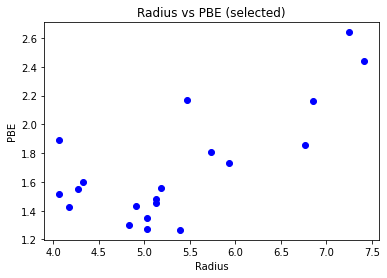

In [413]:
#Drawing r vs Bandgap(PBE) graph for molecules with in the selected range

list_trend_PBE = []
for i in list_data_combined:
    if i[1] > 4.0 and i[2] > 1.2 and i[2] < 2.645:
        list_trend_PBE.append(i)
pd_list_trend_PBE = pd.DataFrame(list_trend_PBE, columns = ['Formula','Radius', 'PBE']).sort_values(by = 'Radius')
print(pd_list_trend_PBE)
for i in list_trend_PBE:
    plt.scatter(i[1], i[2], c = 'b')
plt.xlabel('Radius')
plt.ylabel('PBE')
plt.title('Radius vs PBE (selected)')
plt.show()

[array([0.27626993]), 0.2176879086981207]
0.5271423462658125


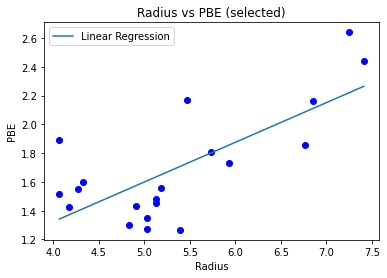

In [467]:
#linear regression line to analyse the trend line

import numpy as np 
import scipy

x1 = pd_list_trend_PBE['Radius']
y1 = pd_list_trend_PBE['PBE']

from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(x1.values.reshape(-1,1), y1)
r_squared = line_fitter.score(x1.values.reshape(-1,1), y1)
print([line_fitter.coef_, line_fitter.intercept_])
print(r_squared)
plt.plot(x1,line_fitter.predict(x1.values.reshape(-1,1)), label = 'Linear Regression')

#plt.plot(x2,y2, label = 'Logarithmic Regression')
for i in list_trend_PBE:
    plt.scatter(i[1], i[2], c = 'b')
plt.legend()
plt.xlabel('Radius')
plt.ylabel('PBE')
plt.title('Radius vs PBE (selected)')
plt.show()

                    Formula  Radius       PBE
32      Cu20Ni8H96C88I20N48    2.45  1.090160
55            Cu12H24C72O48    2.45  0.886534
33             Cu2H44C24O10    2.51  0.979340
35             Cu2H52C28O10    2.51  0.957272
42              Cu2H28C16O8    2.53  0.839334
43          Cu4H48C64Cl8O24    2.53  0.760509
3               Cu2H36C36O8    2.53  0.867786
9   Pr6Cu14H90C106I14N24O44    2.55  0.926072
38         Cu4H68C88I4N12O4    2.55  1.054470
39         Cu4H68C88I4N12O4    2.55  0.877189
44            Cu4H12C16I4N8    2.55  0.789569
30           Cu2H20C12N4O10    2.55  0.868860
45             Cu4H24C16O20    2.55  0.850355
46              Cu2H12C8O10    2.57  0.873895
10            Cu2H18C20I2N2    2.57  1.020100
52    Cu8Si2H64W24C80N16O80    2.59  0.994949
13            Cu2H30C54I2N6    2.59  0.817112
34           Cu8H36C44I8N12    2.61  0.740531
15          Cu16H32C40I16N8    2.61  0.916569
11          Cu2H12C20N12O16    2.61  0.760017
19            Cu4H28C28I4N8    2.6

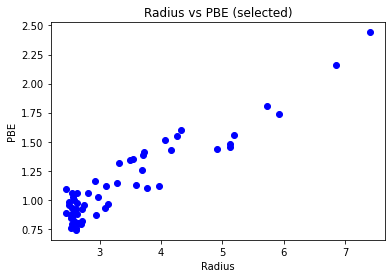

In [468]:
#Extending the linear regression line to explore molecules that share similar characteristics

list_trend_PBE = []
for i in list_data_combined:
    if i[2] < i[1]*0.27626993 + 0.21768791 + 0.2 and  i[2] > i[1]*0.27626993 + 0.21768791 - 0.2:
        list_trend_PBE.append(i)
pd_list_trend_PBE = pd.DataFrame(list_trend_PBE, columns = ['Formula','Radius', 'PBE']).sort_values(by = 'Radius')
print(pd_list_trend_PBE)
for i in list_trend_PBE:
    plt.scatter(i[1], i[2], c = 'b')
plt.xlabel('Radius')
plt.ylabel('PBE')
plt.title('Radius vs PBE (selected)')
plt.show()